## First Neural Network

In [1]:
import pandas as pd
import numpy as np
from tsfresh import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters

# If you need to plot or visualize data later on
import matplotlib.pyplot as plt
import seaborn as sns

# For any data preprocessing or manipulation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Depending on the models you plan to use
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


/Users/ry/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(


## Dataset

In [2]:
fazeli_mitbih_train_df = pd.read_csv('../data/mitbih_train.csv', header=None)

In [3]:
column_187 = fazeli_mitbih_train_df.iloc[:, 187]
column_187.value_counts()

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

## Comprehensive Feature Extraction

using tsfresh time series comprehensive feature extraction package

### Next cell takes 15-30 min to run

In [4]:
import pandas as pd
from tsfresh import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters

# Load your dataset
fazeli_mitbih_train_df = pd.read_csv('../data/mitbih_train.csv', header=None)

# Assign a unique ID to each row and separate the target variable
fazeli_mitbih_train_df['id'] = range(len(fazeli_mitbih_train_df))
target_series = fazeli_mitbih_train_df[187]

# Keep only features and the unique ID for feature extraction
fazeli_mitbih_train_df_features_only = fazeli_mitbih_train_df.drop(columns=[187])

# Convert to long format, preserving the 'id' for direct mapping
long_df = fazeli_mitbih_train_df_features_only.melt(id_vars='id', var_name='time', value_name='amplitude')

# Define feature extraction settings
extraction_settings = ComprehensiveFCParameters()

# Incremental extraction setup
unique_ids = long_df['id'].unique()
subset_size = 10000  # Adjust based on your dataset size and memory constraints
extracted_features_list = []

for i in range(0, len(unique_ids), subset_size):
    subset_ids = unique_ids[i:i+subset_size]
    subset_df = long_df[long_df['id'].isin(subset_ids)]
    
    # Extract features for this subset
    subset_features = extract_features(subset_df, column_id='id', column_sort='time',
                                       default_fc_parameters=extraction_settings, n_jobs=7)
    extracted_features_list.append(subset_features)



Feature Extraction:   0%|                                | 0/35 [00:00<?, ?it/s]/Users/ry/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(
/Users/ry/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(
/Users/ry/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(
/Users/ry/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Plea

Feature Extraction:   0%|                                | 0/35 [00:00<?, ?it/s]/Users/ry/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(
/Users/ry/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(
/Users/ry/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(
/Users/ry/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Plea

In [5]:

# Combine extracted features from all subsets
extracted_features = pd.concat(extracted_features_list)

# Re-associate the target labels using the 'id' column
# This step correctly maps the original labels to the extracted features based on 'id'
extracted_features['label'] = extracted_features.index.map(lambda idx: target_series.loc[idx])

# Verify the re-association of labels
print(extracted_features[['label']].head())


   label
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0


In [6]:
column_187_extracted = extracted_features['label']
column_187_extracted.value_counts()

label
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

## Set X and y from extracted features, Perform train_test_split

In [7]:
# Setting X and y from my extracted features
X = extracted_features.drop('label', axis=1)
y = extracted_features['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# WIP Neural Network

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Dense

# Assuming your input shape is (timesteps, features)
input_shape = (128, 1)  # Example input shape (128 timesteps, 1 feature)

model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
    GlobalAveragePooling1D(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


2024-02-26 19:32:25.577431: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-02-26 19:32:25.577449: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-02-26 19:32:25.577455: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-02-26 19:32:25.577508: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-26 19:32:25.577529: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 64)           256       
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 6857 (26.79 KB)
Trainable params: 6857 (26.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Dense

# Assuming your input shape is (timesteps, features)
input_shape = (187, 1)  # Adjusted input shape to match your dataset

# Adjusting the model for 5-class classification
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
    GlobalAveragePooling1D(),
    Dense(100, activation='relu'),
    Dense(5, activation='softmax')  # Adjusted for 5 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 185, 64)           256       
                                                                 
 global_average_pooling1d_1  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 100)               6500      
                                                                 
 dense_3 (Dense)             (None, 5)                 505       
                                                                 
Total params: 7261 (28.36 KB)
Trainable params: 7261 (28.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Assuming fazeli_mitbih_train_df is your DataFrame and the last column is the label
X = fazeli_mitbih_train_df.iloc[:, :-1].values
y = fazeli_mitbih_train_df.iloc[:, -1].values

# Reshape X to fit the Conv1D input requirements and convert y to categorical
X_reshaped = X.reshape((X.shape[0], X.shape[1], 1))
y_categorical = to_categorical(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


In [4]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Dense

# Assuming your input shape is (timesteps, features)
input_shape = (187, 1)  # Adjusted input shape to match your dataset

# Simplified model for 5-class classification
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),  # Reduced filters
    GlobalAveragePooling1D(),
    Dense(50, activation='relu'),  # Reduced neurons
    Dense(5, activation='softmax')  # For 5 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary to confirm changes
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 185, 32)           128       
                                                                 
 global_average_pooling1d (  (None, 32)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 50)                1650      
                                                                 
 dense_1 (Dense)             (None, 5)                 255       
                                                                 
Total params: 2033 (7.94 KB)
Trainable params: 2033 (7.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-02-27 11:37:17.145355: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-02-27 11:37:17.145375: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-02-27 11:37:17.145379: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-02-27 11:37:17.145785: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-27 11:37:17.145959: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Assuming fazeli_mitbih_train_df is your DataFrame and the last column is the label
X = fazeli_mitbih_train_df.iloc[:, :-1].values
y = fazeli_mitbih_train_df.iloc[:, -1].values

# Reshape X to fit the Conv1D input requirements and convert y to categorical
X_reshaped = X.reshape((X.shape[0], X.shape[1], 1))
y_categorical = to_categorical(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.2, random_state=42)

# Specify a smaller batch size
batch_size = 32

# Train the model with the specified batch size and include validation data for monitoring
model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
   1/2189 [..............................] - ETA: 11:33 - loss: 1.6110 - accuracy: 0.0938

2024-02-27 11:37:22.986241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2189/2189 [==============================] - ETA: 0s - loss: 0.6501 - accuracy: 0.8237

2024-02-27 11:37:39.592870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2189/2189 [==============================] - 20s 9ms/step - loss: 0.6501 - accuracy: 0.8237 - val_loss: 0.6064 - val_accuracy: 0.8321
Epoch 2/10
2189/2189 [==============================] - 19s 9ms/step - loss: 0.6216 - accuracy: 0.8242 - val_loss: 0.6074 - val_accuracy: 0.8284
Epoch 3/10
2189/2189 [==============================] - 19s 8ms/step - loss: 0.6200 - accuracy: 0.8238 - val_loss: 0.6130 - val_accuracy: 0.8074
Epoch 4/10
2189/2189 [==============================] - 19s 9ms/step - loss: 0.6157 - accuracy: 0.8243 - val_loss: 0.6008 - val_accuracy: 0.8272
Epoch 5/10
2189/2189 [==============================] - 19s 9ms/step - loss: 0.6104 - accuracy: 0.8236 - val_loss: 0.5916 - val_accuracy: 0.8326
Epoch 6/10
2189/2189 [==============================] - 18s 8ms/step - loss: 0.6044 - accuracy: 0.8234 - val_loss: 0.5824 - val_accuracy: 0.8324
Epoch 7/10
2189/2189 [==============================] - 19s 8ms/step - loss: 0.5974 - accuracy: 0.8229 - val_loss: 0.5843 - val_accuracy: 0.8

In [6]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy}")



548/548 - 3s - loss: 0.5797 - accuracy: 0.8343 - 3s/epoch - 5ms/step
Test Accuracy: 0.8342756032943726


137/548 [======>.......................] - ETA: 0s

2024-02-27 11:41:18.731913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


548/548 [==============================] - 1s 1ms/step


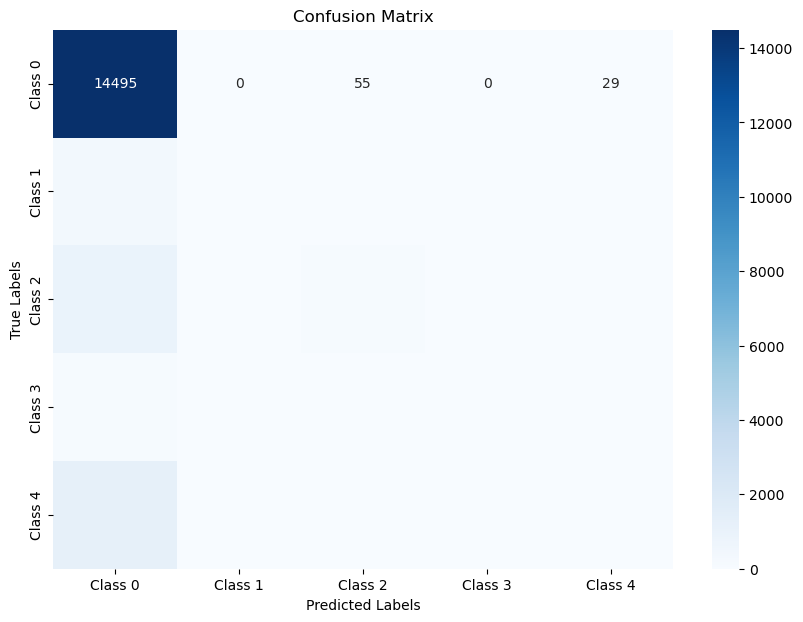

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the classes with the model
predictions = model.predict(X_test)

# Convert predictions from one-hot encoded vectors to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert true labels from one-hot encoded vectors to class labels
true_labels = np.argmax(y_test, axis=1)

# Now you can compute the confusion matrix and plot it as previously described
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"], yticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

